# Import your data into a Pandas DataFrame.
- Merge your DataFrames.
- Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
- Determine the mean, median, and mode for the following:
    - The total number of rides for each city type.
    - The average fares for each city type.
    - The total number of drivers for each city type.
- Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
    - The number of rides for each city type.
    - The fares for each city type.
    - The number of drivers for each city type.
- Create a pie chart that visualizes each of the following data for each city type:
    - The percent of total fares.
    - The percent of total rides.
    - The percent of total drivers.

In [1]:
# Add Matplotlib inline magic command
%matplotlib widget
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [6]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
test = city_data_df.groupby([city_data_df["type"]]).count()["city"]
test.head()

type
Rural       18
Suburban    36
Urban       66
Name: city, dtype: int64

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


- The average fare for each type of city on the y-axis
- The total number of rides for each type of city on the x-axis
- Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city

In [11]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [13]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [14]:
urban_ride_count = urban_cities_df.groupby(urban_cities_df["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [15]:
suburban_ride_count = suburban_cities_df.groupby(suburban_cities_df["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [16]:
rural_ride_count = rural_cities_df.groupby(rural_cities_df["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [17]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [18]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [19]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [20]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

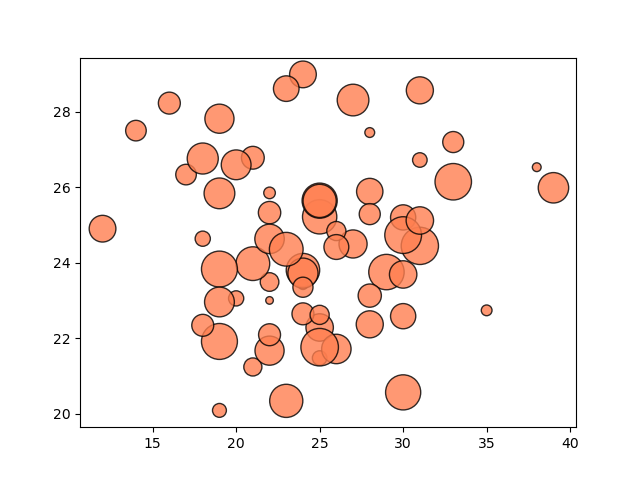

In [21]:
plt.scatter(
    urban_ride_count, 
    urban_avg_fare,

    s = urban_driver_count * 10,
    c = "coral",

    edgecolor = "k",
    linewidth = 1,

    alpha = 0.8,
    label = "Urban"
    )

In [22]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

In [23]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

In [24]:
# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

In [25]:
lgnd = plt.legend(
    fontsize = "12",
    mode = "Expanded",
    scatterpoints = 1,
    loc = "best",
    title = "City Types"
)

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

In [26]:
# Save the figure.
plt.savefig("analysis/Fig1.png")

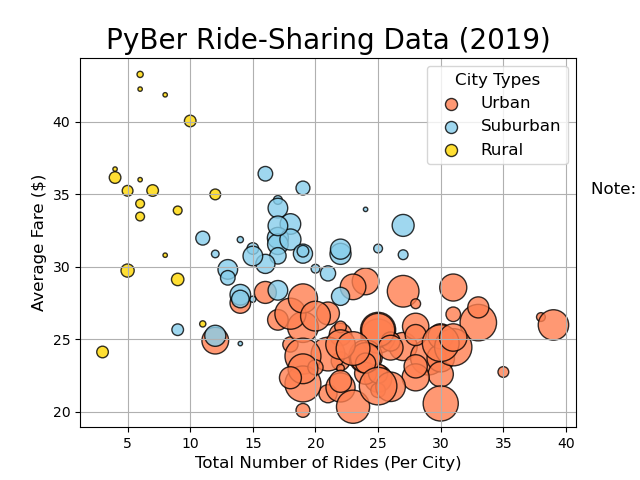

In [27]:
plt.show()

In [28]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [29]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [30]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [31]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [33]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [34]:
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [35]:
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [36]:
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [37]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [38]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [39]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [40]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [41]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [42]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [43]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [44]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [45]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [47]:
# Calculate the measures of central tendency for the average driver for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean drivers for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers for urban trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers for urban trips is {mode_urban_drivers}.")

The mean drivers for urban trips is 36.68.
The median drivers for urban trips is 37.00.
The mode drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [48]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [49]:
# Calculate the measures of central tendency for the average driver for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers for suburban trips is {mode_suburban_drivers}.")

The mean drivers for suburban trips is 13.71.
The median drivers for suburban trips is 16.00.
The mode drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [50]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [51]:
# Calculate the measures of central tendency for the average driver for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers for rural trips is {mode_rural_drivers}.")

The mean drivers for rural trips is 4.30.
The median drivers for rural trips is 4.00.
The mode drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


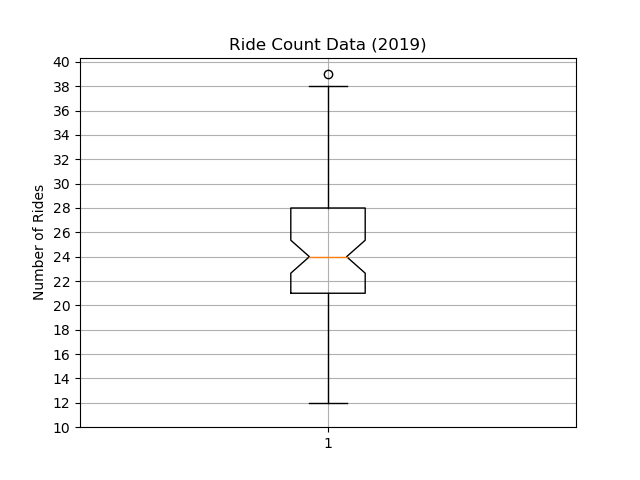

In [63]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2))
ax.grid()
plt.show()

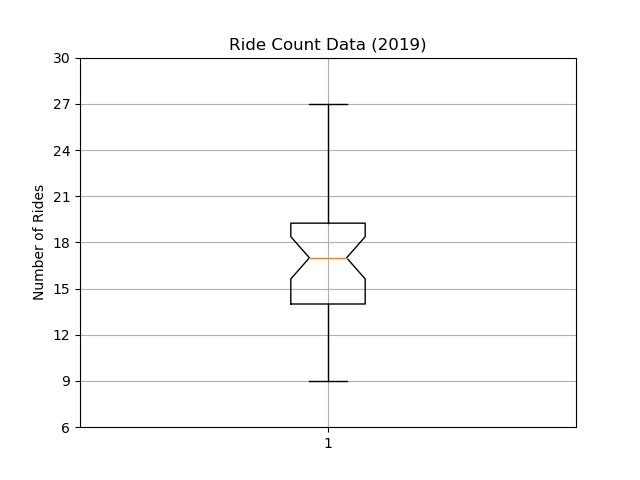

In [64]:
x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(6, 31, step = 3))
ax.grid()
plt.show()

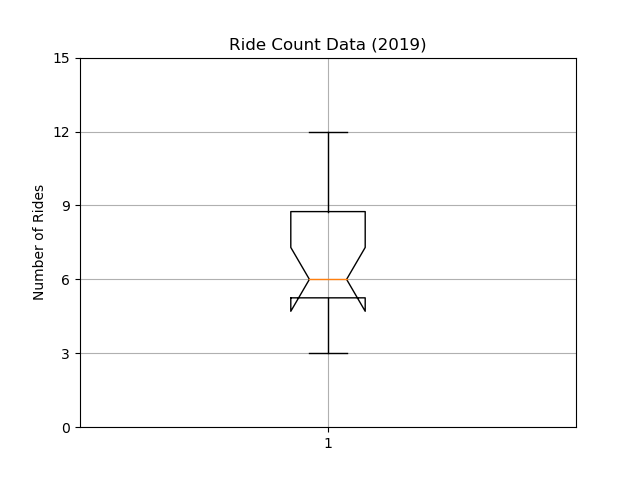

In [65]:
x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 16, step = 3))
ax.grid()
plt.show()

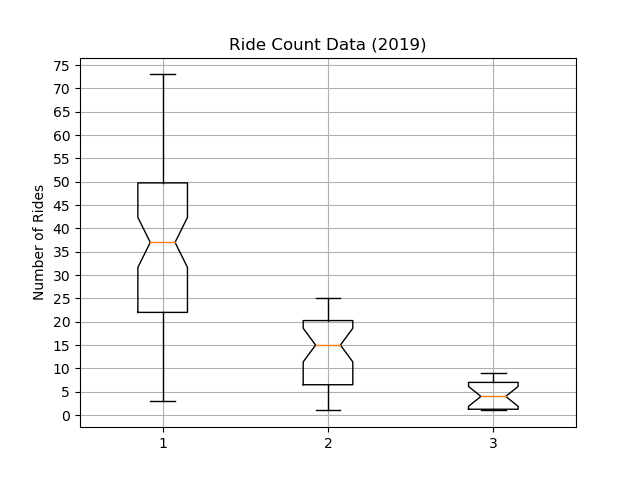

In [69]:
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
ax.boxplot([urban_driver_count, suburban_driver_count, rural_driver_count], x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 76, step = 5))
ax.grid()

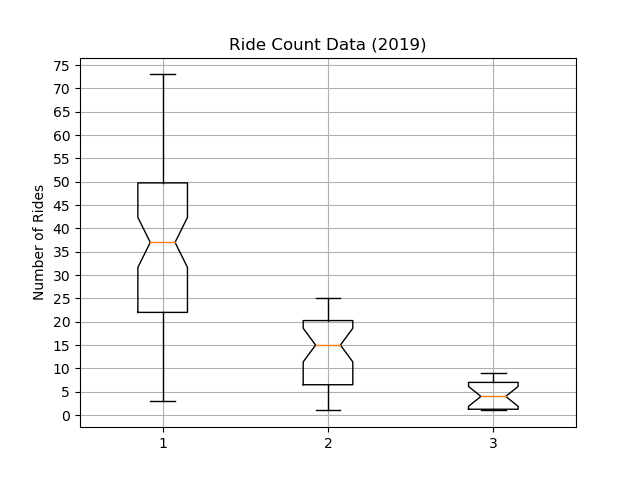

In [70]:
fig.savefig(os.path.join("analysis", "Fig4.png"))
fig.show()